In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#STtep1: Sample Dataset(10 records,3 features)
data=np.array([
    [2.5,2.4,1.2],
    [0.5,0.7,0.3],
    [2.2,2.9,1.4],
    [1.9,2.2,1.1],
    [3.1,3.0,1.7],
    [2.3,2.7,1.5],
    [2.0,1.6,0.9],
    [1.0,1.1,0.4],
    [1.5,1.6,0.8],
])

In [3]:
df=pd.DataFrame(data,columns=["X","Y","Z"])

In [4]:
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.3,2.7,1.5
6,2.0,1.6,0.9
7,1.0,1.1,0.4
8,1.5,1.6,0.8


In [7]:
df.head()

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7


In [5]:
standardized_data=(df-df.mean())/df.std()

In [6]:
cov_matrix=np.cov(standardized_data.T)

In [12]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [13]:
#Step 5:
sorted_indices=np.argsort(eig_vals)[::-1]
eig_vals=eig_vals[sorted_indices]
eig_vecs=eig_vecs[:,sorted_indices]

In [14]:
eig_vecs_subset=eig_vecs[:,:2]

In [16]:
reduced_data=standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df =pd.DataFrame(reduced_data,columns=['PC1','PC2'])

In [17]:
print("\nReduced Data:(AFTER PCA):\n",reduced_df)


Reduced Data:(AFTER PCA):
         PC1       PC2
0  0.912245  0.280295
1 -2.833210 -0.150122
2  1.293138 -0.460307
3  0.215152 -0.142057
4  2.379437  0.237183
5  1.345260 -0.271091
6 -0.381194  0.464403
7 -2.066608  0.034793
8 -0.864220  0.006903


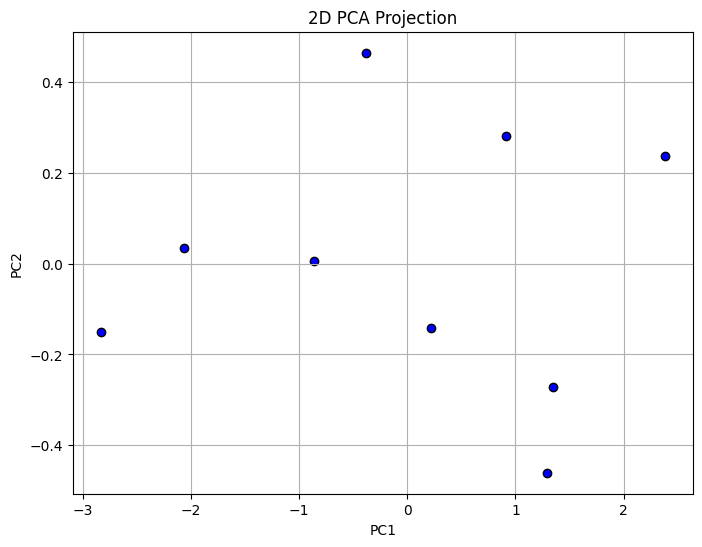

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(reduced_df['PC1'],reduced_df['PC2'],color='blue',edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()